# TP N°3 : Les Réseaux de Neurones Convolutifs

## Travail réalisé par Iheb Alimi et Riadh Ibrahim (RT4-Grp2)

# Construction d'un Small CNN

In [16]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.models import model_from_json
import tensorflow as tf

2025-04-26 11:46:19.390678: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-26 11:46:19.429035: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-26 11:46:19.429188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-26 11:46:19.430679: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-26 11:46:19.438317: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-26 11:46:19.439069: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [19]:
def get_data_mnist():
    # Load data
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    # Reshape to [samples, width, height, channels]
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    
    # Normalize pixel values to [0, 1]
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    # One-hot encode outputs
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    num_classes = y_test.shape[1]
    
    return (X_train, y_train), (X_test, y_test), num_classes

11490434/11490434 [==============================] - 0s 0us/step


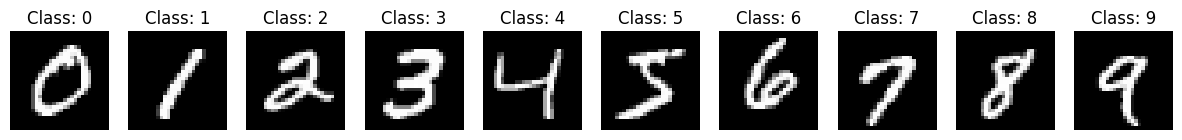

In [22]:
(X_train, y_train), (X_test, y_test), num_classes = get_data_mnist()

import matplotlib.pyplot as plt

# Visualize some examples from the dataset
def visualize_data(X, y, num_classes):
    fig, axes = plt.subplots(1, num_classes, figsize=(15, 5))
    for i in range(num_classes):
        idx = np.where(y[:, i] == 1)[0][0]  # Find first example of class i
        axes[i].imshow(X[idx].reshape(28, 28), cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f"Class: {i}")
    plt.show()

visualize_data(X_train, y_train, num_classes)

In [25]:
def small_model():
    # Create model
    model = Sequential()
    model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [28]:
def print_model_error_rate(model, X_test, y_test):
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Model score: %.2f%%" % (scores[1] * 100))
    print("Model error rate: %.2f%%" % (100 - scores[1] * 100))

In [31]:
# Main execution
if __name__ == "__main__":
    # Get data
    (X_train, y_train), (X_test, y_test), num_classes = get_data_mnist()
    
    # Build model
    model = small_model()
    
    # Train model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
    
    # Evaluate model
    print_model_error_rate(model, X_test, y_test)

Epoch 1/10
2025-04-26 11:46:45.633174: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
300/300 [==============================] - 71s 234ms/step - loss: 0.2378 - accuracy: 0.9298 - val_loss: 0.0730 - val_accuracy: 0.9783
Epoch 2/10
300/300 [==============================] - 70s 235ms/step - loss: 0.0683 - accuracy: 0.9798 - val_loss: 0.0566 - val_accuracy: 0.9823
Epoch 3/10
300/300 [==============================] - 70s 235ms/step - loss: 0.0472 - accuracy: 0.9856 - val_loss: 0.0459 - val_accuracy: 0.9850
Epoch 4/10
300/300 [==============================] - 71s 236ms/step - loss: 0.0369 - accuracy: 0.9889 - val_loss: 0.0446 - val_accuracy: 0.9856
Epoch 5/10
300/300 [==============================] - 74s 246ms/step - loss: 0.0290 - accuracy: 0.9912 - val_loss: 0.0472 - val_accuracy: 0.9863
Epoch 6/10
300/300 [==============================] - 71s 236ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0452 - val

# Construction des 3 modèles après normalisation de données

In [34]:
# Modified function (already includes normalization)
def get_data_mnist():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    # Before normalization
    print("Before normalization:")
    print(f"X_train pixel range: {X_train.min()} to {X_train.max()}")
    
    # Reshape and normalize
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0
    
    # After normalization
    print("After normalization:")
    print(f"X_train pixel range: {X_train.min()} to {X_train.max()}")
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    num_classes = y_test.shape[1]
    return (X_train, y_train), (X_test, y_test), num_classes

=== Testing get_data_mnist() ===
Before normalization:
X_train pixel range: 0 to 255
After normalization:
X_train pixel range: 0.0 to 1.0


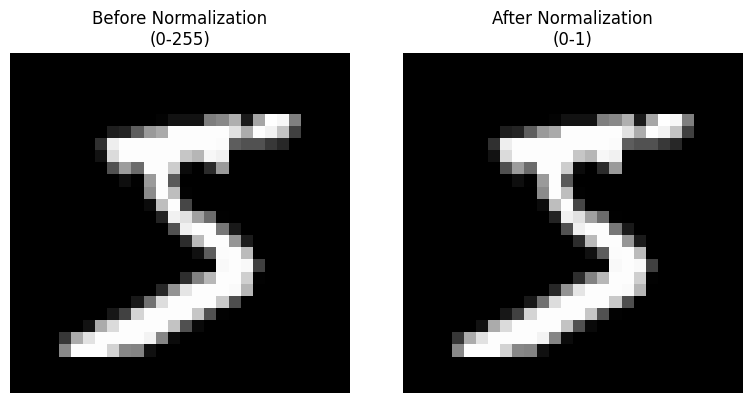

In [37]:
# Test the function
if __name__ == "__main__":
    print("=== Testing get_data_mnist() ===")
    (X_train, y_train), (X_test, y_test), num_classes = get_data_mnist()
    
    # Visualize the first image before and after normalization
    # Reload raw data for visualization (before normalization)
    (X_train_raw, _), (X_test_raw, _) = mnist.load_data()
    
    plt.figure(figsize=(8, 4))
    # Before normalization
    plt.subplot(1, 2, 1)
    plt.imshow(X_train_raw[0], cmap='gray')
    plt.title("Before Normalization\n(0-255)")
    plt.axis('off')
    
    # After normalization
    plt.subplot(1, 2, 2)
    plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
    plt.title("After Normalization\n(0-1)")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

The difference between the data before and after normalization lies in the pixel value range:

1. Before normalization : The pixel values range from 0 to 255, which represents the original grayscale intensity (0 being black and 255 being white).
2. After normalization : The pixel values are scaled to a range of 0 to 1 by dividing each value by 255, which helps in improving the training of the machine learning model since smaller values avoid numerical instability and make the model converge faster during optimization.

## Small CNN after normalization

In [40]:
# Build and train the model again using normalized data
model_normalized = small_model()
history_normalized = model_normalized.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Evaluate the normalized model
print_model_error_rate(model_normalized, X_test, y_test)

Epoch 1/10
2025-04-26 12:01:53.908063: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
300/300 [==============================] - 72s 240ms/step - loss: 0.2283 - accuracy: 0.9350 - val_loss: 0.0695 - val_accuracy: 0.9783
Epoch 2/10
300/300 [==============================] - 73s 243ms/step - loss: 0.0651 - accuracy: 0.9803 - val_loss: 0.0570 - val_accuracy: 0.9816
Epoch 3/10
300/300 [==============================] - 73s 242ms/step - loss: 0.0464 - accuracy: 0.9855 - val_loss: 0.0423 - val_accuracy: 0.9858
Epoch 4/10
300/300 [==============================] - 72s 241ms/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0579 - val_accuracy: 0.9836
Epoch 5/10
300/300 [==============================] - 73s 242ms/step - loss: 0.0276 - accuracy: 0.9916 - val_loss: 0.0521 - val_accuracy: 0.9841
Epoch 6/10
300/300 [==============================] - 78s 261ms/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0444 - val

## Medium CNN

In [43]:
# Medium CNN
def medium_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [46]:
# Evaluate model
def print_model_error_rate(model, X_test, y_test, model_name="Model"):
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f"{model_name} score: %.2f%%" % (scores[1] * 100))
    print(f"{model_name} error rate: %.2f%%" % (100 - scores[1] * 100))
    return scores[1] * 100, 100 - scores[1] * 100

Before normalization:
X_train pixel range: 0 to 255
After normalization:
X_train pixel range: 0.0 to 1.0
=== Training Medium CNN ===
Epoch 1/10
2025-04-26 12:16:28.718232: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
300/300 [==============================] - 20s 66ms/step - loss: 0.2397 - accuracy: 0.9330 - val_loss: 0.0794 - val_accuracy: 0.9761
Epoch 2/10
300/300 [==============================] - 16s 53ms/step - loss: 0.0717 - accuracy: 0.9787 - val_loss: 0.0500 - val_accuracy: 0.9845
Epoch 3/10
300/300 [==============================] - 21s 69ms/step - loss: 0.0520 - accuracy: 0.9845 - val_loss: 0.0398 - val_accuracy: 0.9867
Epoch 4/10
300/300 [==============================] - 22s 74ms/step - loss: 0.0400 - accuracy: 0.9879 - val_loss: 0.0373 - val_accuracy: 0.9866
Epoch 5/10
300/300 [==============================] - 21s 71ms/step - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0360 - val_accuracy: 0.9879

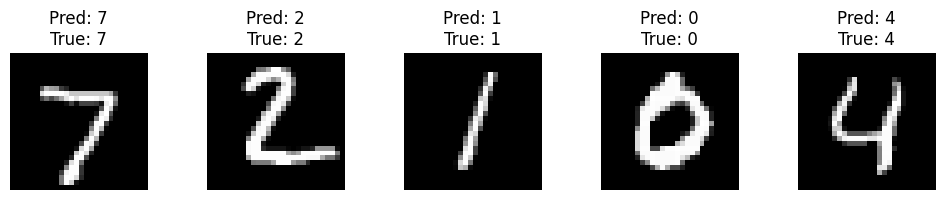

In [49]:
# Test Medium CNN
if __name__ == "__main__":
    # Get data
    (X_train, y_train), (X_test, y_test), num_classes = get_data_mnist()
    
    # Build and train
    print("=== Training Medium CNN ===")
    medium_cnn = medium_model()
    medium_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
    
    # Evaluate
    acc, err = print_model_error_rate(medium_cnn, X_test, y_test, "Medium CNN")
    
    # Test: Visualize predictions
    print("\n=== Visualizing Predictions ===")
    predictions = medium_cnn.predict(X_test[:5])
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(y_test[:5], axis=1)
    
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## Large CNN

In [52]:
# Large CNN
def large_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [55]:
# Evaluate model
def print_model_error_rate(model, X_test, y_test, model_name="Model"):
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f"{model_name} score: %.2f%%" % (scores[1] * 100))
    print(f"{model_name} error rate: %.2f%%" % (100 - scores[1] * 100))
    return scores[1] * 100, 100 - scores[1] * 100

Before normalization:
X_train pixel range: 0 to 255
After normalization:
X_train pixel range: 0.0 to 1.0
=== Training Large CNN ===
Epoch 1/10
2025-04-26 12:28:44.875918: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
300/300 [==============================] - 19s 61ms/step - loss: 0.3040 - accuracy: 0.9112 - val_loss: 0.0828 - val_accuracy: 0.9734
Epoch 2/10
300/300 [==============================] - 16s 54ms/step - loss: 0.0760 - accuracy: 0.9769 - val_loss: 0.0559 - val_accuracy: 0.9820
Epoch 3/10
300/300 [==============================] - 16s 54ms/step - loss: 0.0530 - accuracy: 0.9838 - val_loss: 0.0418 - val_accuracy: 0.9854
Epoch 4/10
300/300 [==============================] - 16s 54ms/step - loss: 0.0422 - accuracy: 0.9870 - val_loss: 0.0408 - val_accuracy: 0.9865
Epoch 5/10
300/300 [==============================] - 16s 54ms/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0320 - val_accuracy: 0.9894


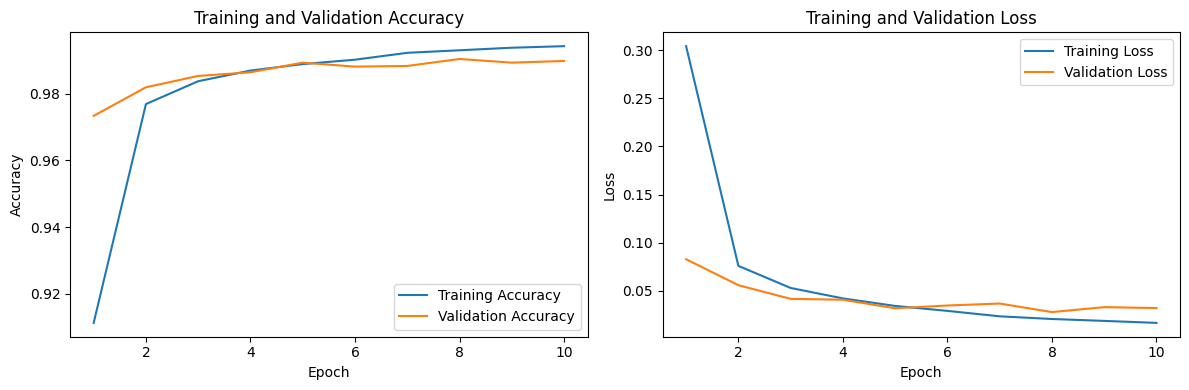

In [58]:
# Test Large CNN
if __name__ == "__main__":
    # Get data
    (X_train, y_train), (X_test, y_test), num_classes = get_data_mnist()
    
    # Build and train
    print("=== Training Large CNN ===")
    large_cnn = large_model()
    history = large_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
    
    # Evaluate
    acc, err = print_model_error_rate(large_cnn, X_test, y_test, "Large CNN")
    
    # Test: Plot training metrics
    print("\n=== Visualizing Training Metrics ===")
    epochs = range(1, 11)
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

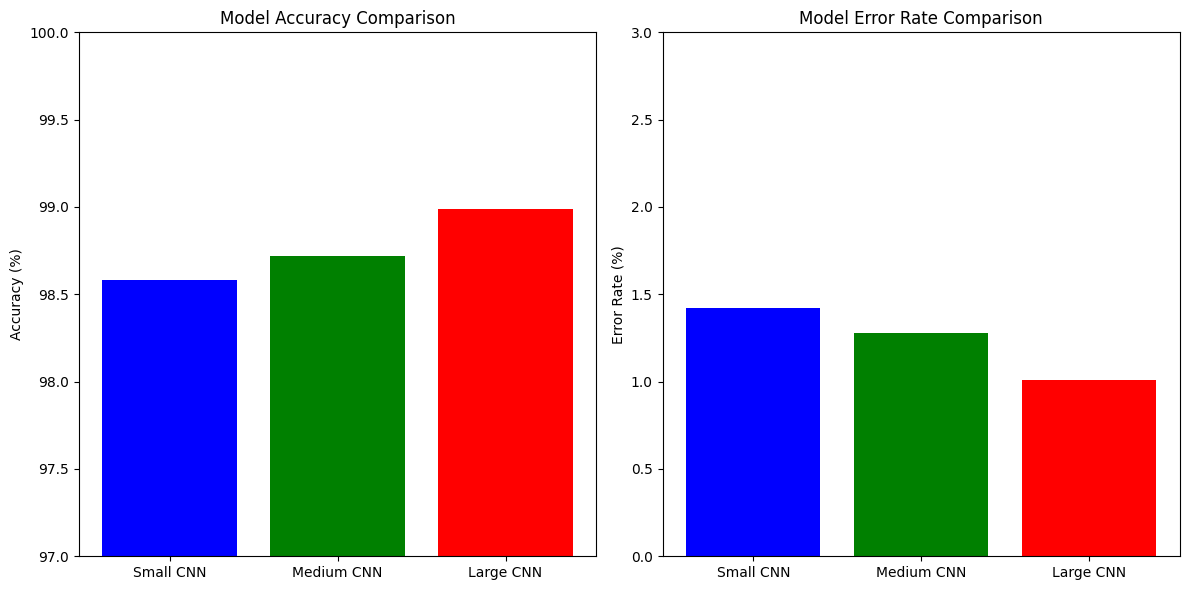

In [61]:
import matplotlib.pyplot as plt

# Data for comparison
models = ['Small CNN', 'Medium CNN', 'Large CNN']
accuracy = [98.58, 98.72, 98.99]
error_rate = [1.42, 1.28, 1.01]

# Plot
plt.figure(figsize=(12, 6))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.bar(models, accuracy, color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(97, 100)

# Error rate comparison
plt.subplot(1, 2, 2)
plt.bar(models, error_rate, color=['blue', 'green', 'red'])
plt.title('Model Error Rate Comparison')
plt.ylabel('Error Rate (%)')
plt.ylim(0, 3)

plt.tight_layout()
plt.show()

1. Small CNN :  Despite its simplicity, the small CNN performs well, achieving high accuracy post-normalization. However, it has a slightly higher error rate compared to the other models.

2. Medium CNN : The addition of MaxPooling and Dropout layers improves the accuracy. This indicates that these layers better capture the features and prevent overfitting compared to the small CNN.

3. Large CNN : The higher complexity of the architecture with additional convolutional, dense layers, and Dropout significantly improves model performance. It achieves the best performance among the three models.

# Sauvegarde et chargements des modèles Keras

In [64]:
# Save model function (from document)
def save_keras_model(model, filename):
    model_json = model.to_json()
    with open(filename + ".json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights(filename + ".h5")
    print(f"Model saved as {filename}.json and {filename}.h5")

In [67]:
# Load model function (from document)
def load_keras_model(filename):
    json_file = open(filename + ".json", 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(filename + ".h5")
    loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(f"Model loaded from {filename}.json and {filename}.h5")
    return loaded_model

Before normalization:
X_train pixel range: 0 to 255
After normalization:
X_train pixel range: 0.0 to 1.0
=== Training Medium CNN (3 epochs for testing) ===
Epoch 1/3
2025-04-26 12:39:24.857211: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
300/300 [==============================] - 15s 50ms/step - loss: 0.2568 - accuracy: 0.9253 - val_loss: 0.0855 - val_accuracy: 0.9755
Epoch 2/3
300/300 [==============================] - 15s 51ms/step - loss: 0.0768 - accuracy: 0.9773 - val_loss: 0.0517 - val_accuracy: 0.9828
Epoch 3/3
300/300 [==============================] - 15s 49ms/step - loss: 0.0545 - accuracy: 0.9837 - val_loss: 0.0456 - val_accuracy: 0.9847

=== Evaluating Medium CNN Before Saving ===
Medium CNN (Before Save) score: 98.47%
Medium CNN (Before Save) error rate: 1.53%

=== Saving Medium CNN ===
Model saved as medium_cnn_test.json and medium_cnn_test.h5

=== Loading Medium CNN ===
Model loaded from medium_c

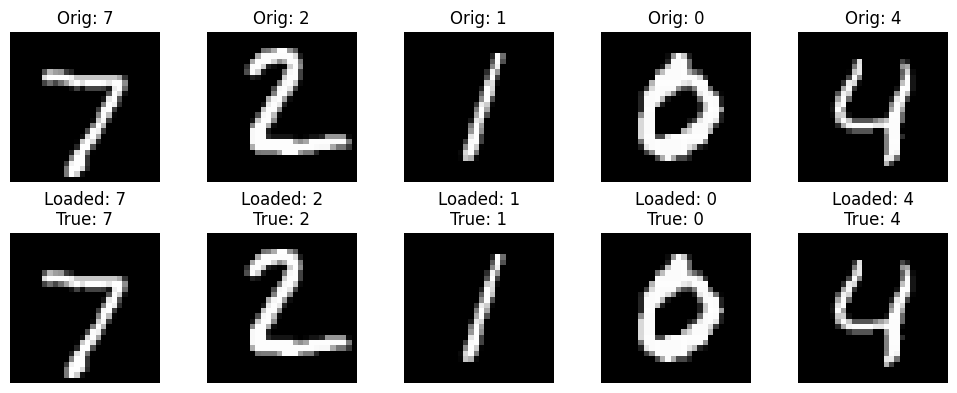

In [70]:
# Test saving and loading
if __name__ == "__main__":
    # Get data
    (X_train, y_train), (X_test, y_test), num_classes = get_data_mnist()
    
    # Train Medium CNN for a few epochs
    print("=== Training Medium CNN (3 epochs for testing) ===")
    medium_cnn = medium_model()
    medium_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=200, verbose=1)
    
    # Evaluate before saving
    print("\n=== Evaluating Medium CNN Before Saving ===")
    acc_before, err_before = print_model_error_rate(medium_cnn, X_test, y_test, "Medium CNN (Before Save)")
    
    # Save the model
    print("\n=== Saving Medium CNN ===")
    save_keras_model(medium_cnn, "medium_cnn_test")
    
    # Load the model
    print("\n=== Loading Medium CNN ===")
    loaded_medium_cnn = load_keras_model("medium_cnn_test")
    
    # Evaluate after loading
    print("\n=== Evaluating Medium CNN After Loading ===")
    acc_after, err_after = print_model_error_rate(loaded_medium_cnn, X_test, y_test, "Loaded Medium CNN")
    
    # Test: Compare predictions before and after loading
    print("\n=== Visualizing Predictions Before and After Loading ===")
    test_images = X_test[:5]
    true_labels = np.argmax(y_test[:5], axis=1)
    
    # Predictions from original model
    orig_predictions = medium_cnn.predict(test_images)
    orig_pred_labels = np.argmax(orig_predictions, axis=1)
    
    # Predictions from loaded model
    loaded_predictions = loaded_medium_cnn.predict(test_images)
    loaded_pred_labels = np.argmax(loaded_predictions, axis=1)
    
    # Plot the images with predictions
    plt.figure(figsize=(10, 4))
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Orig: {orig_pred_labels[i]}")
        plt.axis('off')
        
        plt.subplot(2, 5, i+6)
        plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Loaded: {loaded_pred_labels[i]}\nTrue: {true_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [73]:
# Save the large CNN
save_keras_model(large_cnn, "large_cnn_test")

Model saved as large_cnn_test.json and large_cnn_test.h5



=== Loading Large CNN ===
Model loaded from large_cnn_test.json and large_cnn_test.h5

=== Evaluating Large CNN After Loading ===
Loaded Large CNN score: 98.99%
Loaded Large CNN error rate: 1.01%

=== Visualizing Predictions Before and After Loading ===
1/1 [==============================] - 0s 58ms/step


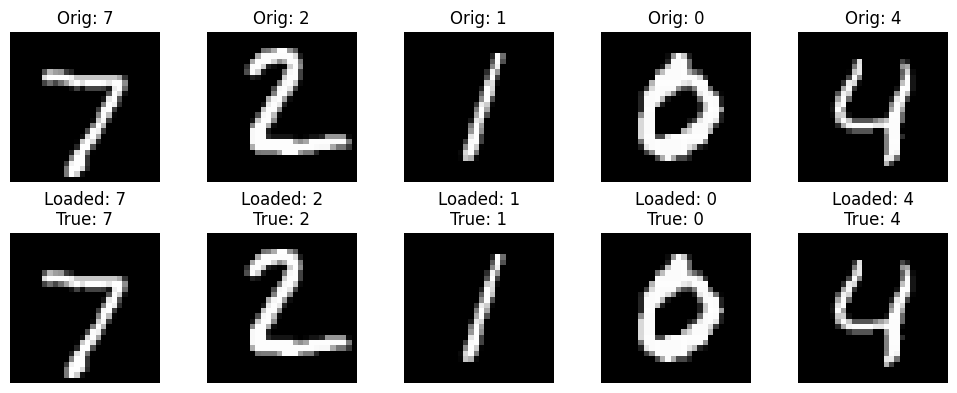

In [76]:
# Reload Large CNN to test consistency
print("\n=== Loading Large CNN ===")
loaded_large_cnn = load_keras_model("large_cnn_test")

# Evaluate after loading
print("\n=== Evaluating Large CNN After Loading ===")
acc_after_large, err_after_large = print_model_error_rate(loaded_large_cnn, X_test, y_test, "Loaded Large CNN")

# Test: Compare predictions before and after loading
print("\n=== Visualizing Predictions Before and After Loading ===")

# Predictions from original large model
orig_predictions_large = large_cnn.predict(test_images)
orig_pred_labels_large = np.argmax(orig_predictions_large, axis=1)

# Predictions from loaded large model
loaded_predictions_large = loaded_large_cnn.predict(test_images)
loaded_pred_labels_large = np.argmax(loaded_predictions_large, axis=1)

# Plot
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Orig: {orig_pred_labels_large[i]}")
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Loaded: {loaded_pred_labels_large[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [79]:
# Save the small CNN
save_keras_model(model_normalized, "small_cnn_test")

Model saved as small_cnn_test.json and small_cnn_test.h5



=== Loading Small CNN ===
Model loaded from small_cnn_test.json and small_cnn_test.h5

=== Evaluating Small CNN After Loading ===
Loaded Small CNN score: 98.58%
Loaded Small CNN error rate: 1.42%

=== Visualizing Predictions Before and After Loading ===
1/1 [==============================] - 0s 38ms/step


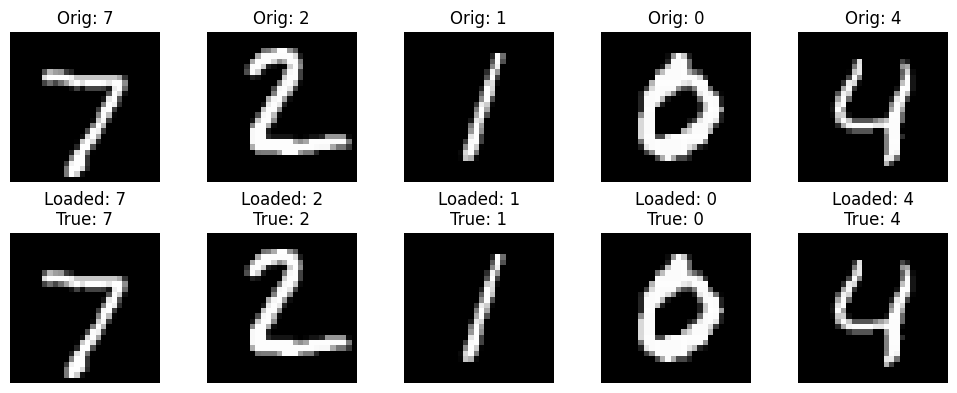

In [82]:
# Reload Small CNN to test consistency
print("\n=== Loading Small CNN ===")
loaded_small_cnn = load_keras_model("small_cnn_test")

# Evaluate after loading
print("\n=== Evaluating Small CNN After Loading ===")
acc_after_small, err_after_small = print_model_error_rate(loaded_small_cnn, X_test, y_test, "Loaded Small CNN")

# Test: Compare predictions before and after loading
print("\n=== Visualizing Predictions Before and After Loading ===")

# Predictions from original small model
orig_predictions_small = model_normalized.predict(test_images)
orig_pred_labels_small = np.argmax(orig_predictions_small, axis=1)

# Predictions from loaded small model
loaded_predictions_small = loaded_small_cnn.predict(test_images)
loaded_pred_labels_small = np.argmax(loaded_predictions_small, axis=1)

# Plot
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Orig: {orig_pred_labels_small[i]}")
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Loaded: {loaded_pred_labels_small[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cbe98a52-e19f-439c-bdc0-2d2e0fbf7f19' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>